# Table of Contents
1. [Introduction](#introduction)
2. [Company Selection](#company-selection)
3. [Company Background](#company-background)
4. [Data Collection](#data-collection)
5. [Feature Generation](#feature-generation)
6. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
7. [Machine Learning Classification Methods](#machine-learning-classification-methods)
8. [Cross-validation for Model Evaluation](#cross-validation-for-model-evaluation)
9. [Evaluation and Comparison of Methods](#evaluation-and-comparison-of-methods)
10. [Feature Importance and Model Interpretation](#feature-importance-and-model-interpretation)
11. [Market and Strategy Returns EDA](#market-and-strategy-returns-eda)
12. [Cumulative Returns Analysis](#cumulative-returns-analysis)
13. [Debate on Predictive Capability](#debate-on-predictive-capability)
14. [Conclusion](#conclusion)


# 1. Introduction
Content for the Introduction section...




# 2. Company Selection
Content for the Company Selection section...




# 3. Company Background

Content for the Company Selection section...

# 4. Data Collection

In this section we will be obtaining the historical data of AMD from yahoo finance using yahooquery library, with the start date of 1st January 2014 to end date of 31st december 2023. we will then be saving the data into a common seperated value (csv file) for effiency in data procession while applying potential machine learning models to our trading strategy

In [84]:
! pip install yahooquery 

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from yahooquery import Ticker
Ul = Ticker('UL')

Ul.income_statement()
Ul


,asOfDate,periodType,currencyCode,BasicAverageShares,BasicEPS,CostOfRevenue,DilutedAverageShares,DilutedEPS,DilutedNIAvailtoComStockholders,EBIT,...,SpecialIncomeCharges,TaxEffectOfUnusualItems,TaxProvision,TaxRateForCalcs,TotalExpenses,TotalOperatingIncomeAsReported,TotalOtherFinanceCost,TotalRevenue,TotalUnusualItems,TotalUnusualItemsExcludingGoodwill
symbol,,,,,,,,,,,,,,,,,,,,,
UL,2020-12-31,12M,EUR,2.620300e+09,2.13,2.868400e+10,2.629800e+09,2.12,5.581000e+09,8.699000e+09,...,-1.044000e+09,-267250000.0,1.923000e+09,0.250,4.136600e+10,8.303000e+09,9000000.0,5.072400e+10,-1.069000e+09,-1.069000e+09
UL,2021-12-31,12M,EUR,2.599900e+09,2.33,3.025900e+10,2.609600e+09,2.32,6.049000e+09,9.054000e+09,...,-1.008000e+09,-248556000.0,1.935000e+09,0.231,4.281800e+10,8.702000e+09,10000000.0,5.244400e+10,-1.076000e+09,-1.076000e+09
UL,2022-12-31,12M,EUR,2.548200e+09,3.00,3.590600e+10,2.559800e+09,2.99,7.642000e+09,1.112600e+10,...,9.150000e+08,211752000.0,2.068000e+09,0.204,5.034600e+10,1.075500e+10,NaN,6.007300e+10,1.038000e+09,1.038000e+09
UL,2023-06-30,TTM,EUR,2.531500e+09,3.27,NaN,2.545100e+09,3.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UL,2023-12-31,12M,EUR,2.515900e+09,2.58,3.442900e+10,2.532400e+09,2.56,6.487000e+09,1.041400e+10,...,-3.150000e+08,-55189000.0,2.199000e+09,0.241,4.956300e+10,9.758000e+09,NaN,5.960400e+10,-2.290000e+08,-2.290000e+08
UL,2023-12-31,TTM,EUR,2.515900e+09,2.58,3.442900e+10,2.532400e+09,2.56,6.487000e+09,1.041400e+10,...,-3.150000e+08,-55189000.0,2.199000e+09,0.241,4.956300e+10,9.758000e+09,NaN,5.960400e+10,-2.290000e+08,-2.290000e+08


# 5. Feature Generation

we will now compute technical indicators like Simple moving average for various periods for our trading strategy. Computing moving averages of 10 days 30 days and 60 days to smoothen out price data and identify trends. Additionaly we are using 5 days rolling standard deviatio to identfy the volatilty. this section also adds the column named 'price rise' which is binary and indicates if the next day's close price is higher. 

In [87]:
#Generating some features that measure the characteristics of stock prices such as rolling averages and rolling standard deviations. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Data_Stock_No_Date.csv') 
dataset = dataset.dropna() 
dataset = dataset[['open', 'high', 'low', 'close']]

dataset['H-L'] = dataset['high'] - dataset['low'] 
dataset['O-C'] = dataset['close'] - dataset['open'] 

dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean() 
dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean() 
dataset['60day MA'] = dataset['close'].shift(1).rolling(window = 60).mean() 
dataset['Std_dev']= dataset['close'].rolling(5).std() 

dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)

dataset = dataset.dropna()
dataset.head()

,open,high,low,close,H-L,O-C,10day MA,30day MA,60day MA,Std_dev,Price_Rise
60,3.93,4.02,3.90,4.01,0.12,0.08,3.970,3.825000,3.813167,0.080000,1
61,4.04,4.10,4.02,4.07,0.08,0.03,3.991,3.835667,3.814167,0.084735,0
62,4.12,4.12,4.06,4.06,0.06,-0.06,4.009,3.848000,3.815333,0.086776,0
63,4.07,4.10,3.97,4.00,0.13,-0.07,4.017,3.859333,3.814167,0.075697,1
64,4.03,4.11,3.92,4.01,0.19,-0.02,4.012,3.869667,3.811167,0.032404,0


# 6. Exploratory Data Analysis (EDA)

Summary Stats. 
We now run summary statistics on the previously generated features including technical indicators, OHLC data and price rise indicators. while closely examining the mean prices of OHLC (open, high , low, close), we can get an inference that its at approximately 44. Whereas the standard deviation is quite high, which indicates a possible wide spread of values. 

the price rise indicatorhas a mean value of 0.50 which shows that the dataset could be balanced with equal number of days with price fall and price rise. 


The correlation matrix computed shows the relationship between moving averages accoss 10 days, 30 days, and 60 days including standard deviation and price rise. There is moderatly strong correlation of 0.78 between moving averages and standard deviation, this indicated that the wider spread of data in daily prices may have an impact on moving averages. Furthermore, when we closely look at price rise correlation with standard deviation and moving averages, we find miniscule correlation which suggests that these indicators alone may not be able to accurately predict the price rise or the fall on any given day.


The distribution histograms in the moving avergaes all shows a common trait to be right-skewed, which shows that all moving averages might have a more common values and this also suggests that while prices are often closer to the lower end, there are periods with significant increases. when we check the standard deviation histogram, we see a significant rapid drop-off as the standard deviation increases. we can also observe the distribution of price rise as consistent with two spikes at 0 and 1. 

We furthermore, examine the histogram of High-Low Price Difference (H-L) which is skewed highly to the right showing the difference between the high and low price is small. The distribution of Open-Close price difference shows a symmetry and a visible peak around zero. This symmetry indicates that the freqency of significant price increase are closer to the frequency of price decrease. This EDA suggests that the Moving averages have a strong consistency internally and the relationship between these features and price rise is weak. As this is an initial Exploratory analysis we can perform advance techniques like machine learning to gauge the efficiency of the features in predicting the price rise of the AMD stock datasets.

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
summ_stats = dataset.describe()
summ_stats

,open,high,low,close,H-L,O-C,10day MA,30day MA,60day MA,Std_dev,Price_Rise
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,44.067060,44.969650,43.144935,44.074878,1.824715,0.007818,43.762059,43.243605,42.554094,1.245815,0.503664
std,42.324198,43.174047,41.437307,42.320786,2.077663,1.725642,42.026053,41.578256,41.090702,1.490131,0.500088
min,1.620000,1.690000,1.610000,1.620000,0.000000,-12.959999,1.728000,1.783667,1.831667,0.008367,0.000000
25%,6.697500,6.790000,6.540000,6.670000,0.250000,-0.349993,6.626500,6.541333,6.008208,0.151476,0.000000
50%,26.455000,27.045000,25.690000,26.300000,0.965001,-0.010000,25.911500,24.689333,24.235833,0.625218,1.000000
75%,82.792501,84.237501,81.022497,82.552500,2.792500,0.320000,82.062499,81.756916,82.006958,1.838229,1.000000
max,163.279999,164.460007,156.100006,161.910004,15.900009,12.460007,154.955000,147.242667,141.458333,9.110697,1.000000


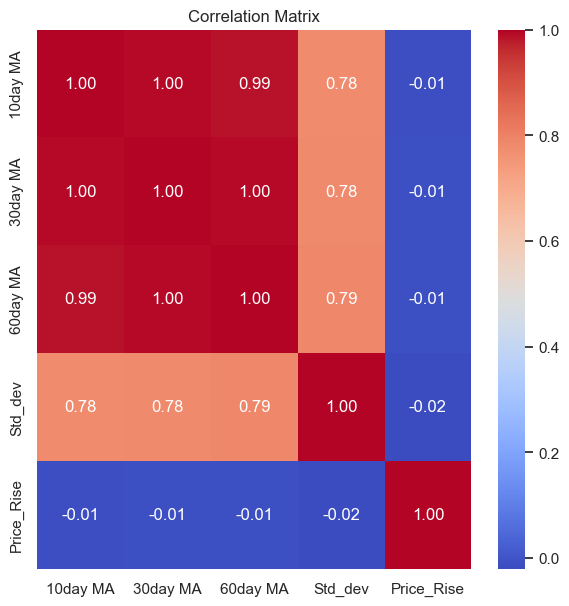

In [89]:
columns_of_interest = ['10day MA', '30day MA', '60day MA', 'Std_dev', 'Price_Rise']
data = dataset[columns_of_interest]

plt.figure(figsize=(7, 7))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

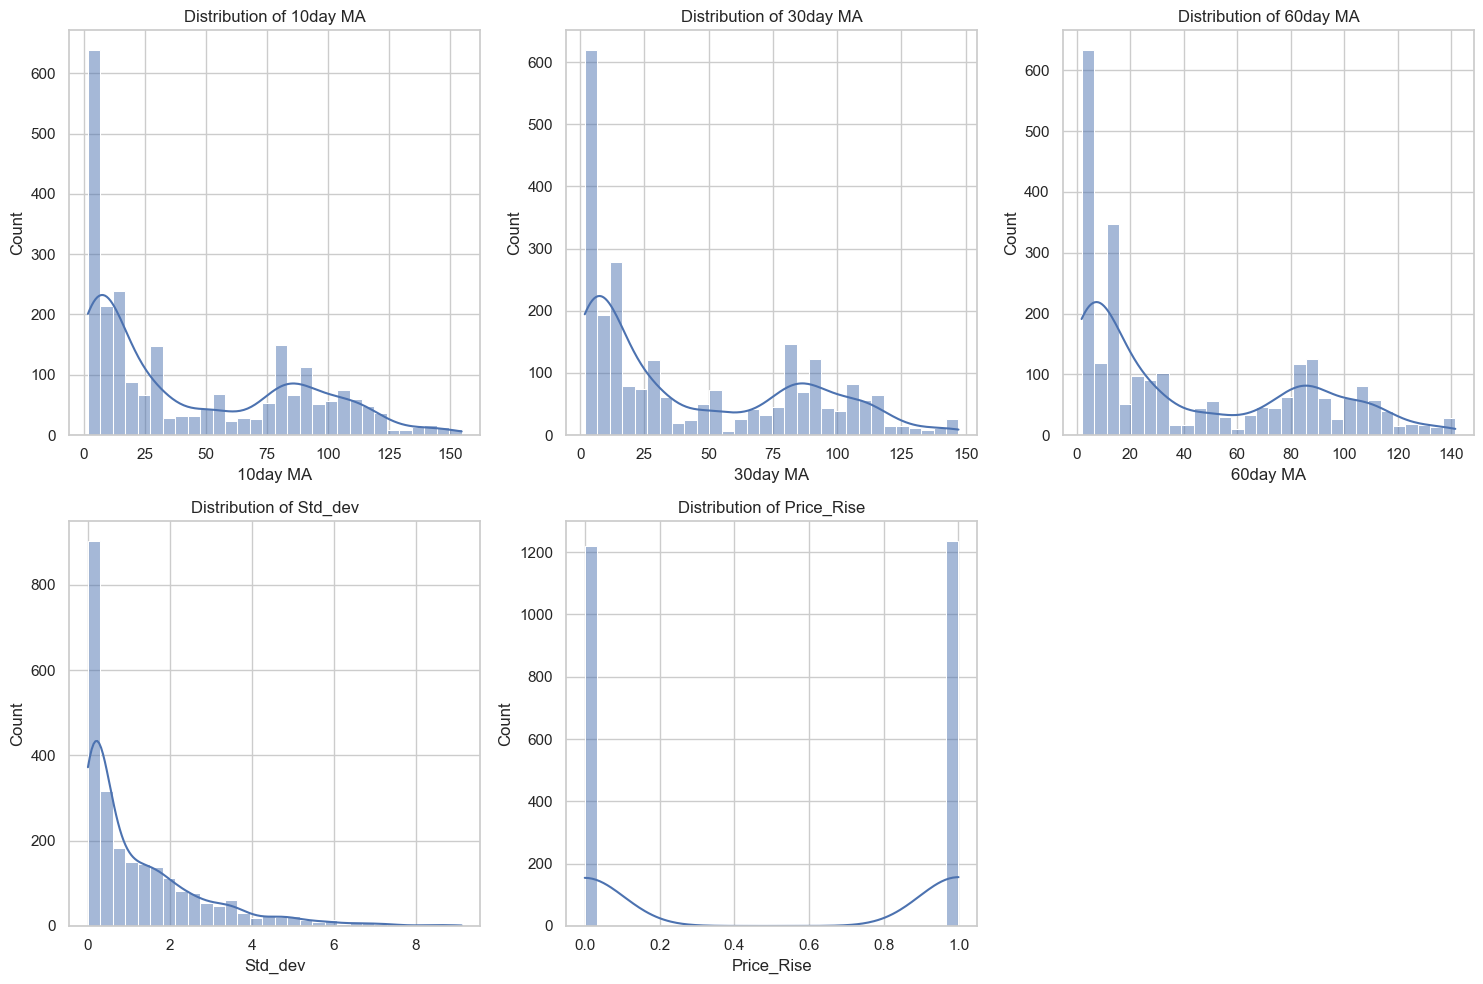

In [94]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  
axs = axs.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')

for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout() 
plt.show()

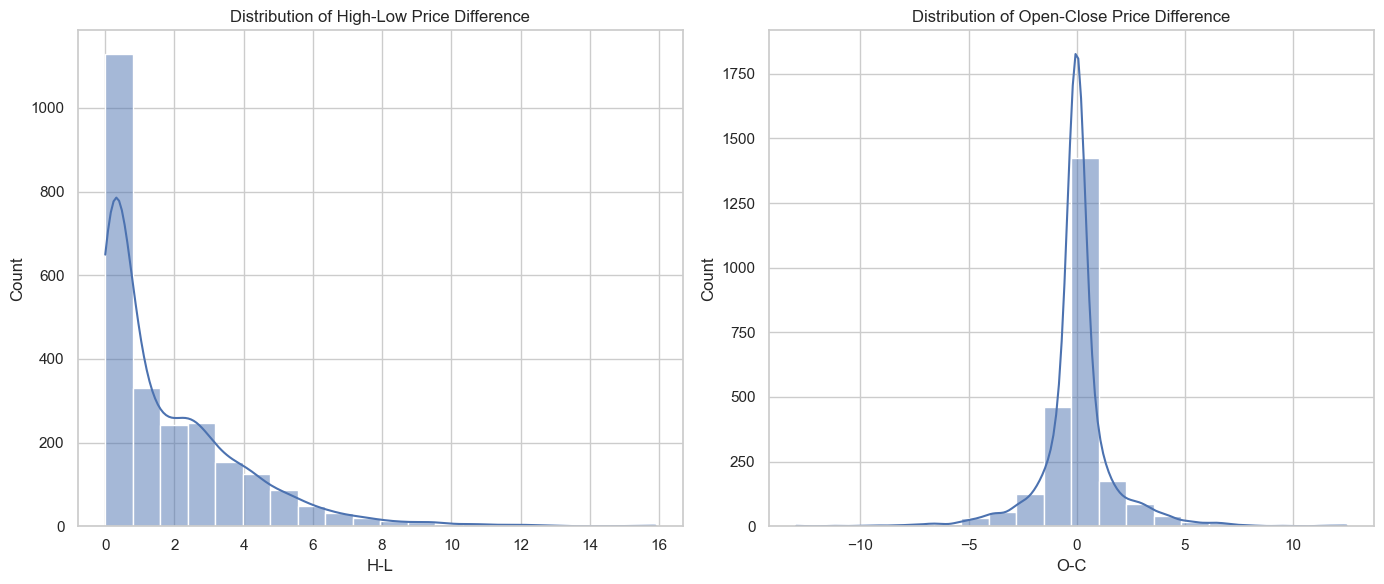

"# Scatter plot for 30day MA vs close prices\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=dataset, x='30day MA', y='close')\nplt.title('30day Moving Average vs Close Prices')\nplt.xlabel('30day Moving Average')\nplt.ylabel('Close Price')\nplt.show()"

In [70]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(dataset['H-L'], bins=20, kde=True)
plt.title('Distribution of High-Low Price Difference')
plt.subplot(1, 2, 2)
sns.histplot(dataset['O-C'], bins=20, kde=True)
plt.title('Distribution of Open-Close Price Difference')
plt.tight_layout()
plt.show()

# 7. Machine Learning Classification Methods

In this section we will be applying 3 machine learning models for evaluation of our trading startegy. we will preprocess datasets for model training and testing by splitting it into training and testing sets and then we will apply feature scaling. This preprocessing is a very important step as it ensures that the model learns effectively and then can be evaluated accurately

## Data preprocessing

Processing data before using ML models

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 4:-1] 
y = dataset.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ExtraTreesClassifier Model 
The classification report demonstrates how well the ExtraTreesClassifier approach performed alongside a binary classifier on a specific dataset. With a 50% total success rate, the model is not outperforming random chance. This indicates that there are issues with either the model or the dataset. With precision scores of 0.51 for class 0 and 0.49 for class 1, the model displays a slight tendency to guess class 0 more frequently than class 1. For example, the recall scores indicate that the model performs slightly better at detecting class 1 occurrences (59%) than class 0 cases (41%). This could imply that the dataset contains more information useful for making class 1 forecasts. The F1-score, which assesses how well accuracy and recall are balanced, is also typical, measuring 0.45 for class 0 and 0.53 for class 1. These scores are typically low for a well-performing algorithm, indicating that it requires improvement. Because support for both classes is nearly equal, it appears that the dataset is balanced, therefore data balancing procedures are not required as a feasible solution.


In [27]:
from sklearn.ensemble import ExtraTreesClassifier
clf_etc = ExtraTreesClassifier(random_state=101)
clf_etc.fit(X_train, Y_train)


from sklearn.metrics import classification_report
Y_pred = clf_etc.predict(X_test)
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.41      0.45       251
           1       0.49      0.59      0.53       241

    accuracy                           0.50       492
   macro avg       0.50      0.50      0.49       492
weighted avg       0.50      0.50      0.49       492



## K-nearest neighbour model
The KNN classifier is only slightly better than random guessing, with an average accuracy of 52%. This small gain over the 50% benchmark shows that the model has found some patterns in the data, but not enough to be effective for making predictions. The accuracy for both groups is the same, at 0.52, which shows that the model is fair when it comes to picking the wrong group over the other. However, there is a big difference in the recall scores. The model has a recall of 0.73 for class 0, which means it correctly identified the negative class a lot of the time, but a recall of 0.32 for class 1, which means it missed a lot of positive cases because of false negatives.
This difference is also clear in the F1-scores: class 0 got a good score of 0.61, while class 1 got a bad score of 0.39, which shows that the positive class did poorly at balancing precision and recall.


In [100]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_train, Y_train)
Y_pred = clf_knn.predict(X_test)

from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.73      0.61       251
           1       0.52      0.32      0.39       241

    accuracy                           0.52       492
   macro avg       0.52      0.52      0.50       492
weighted avg       0.52      0.52      0.50       492



## Naive-Bayes Model 

In [26]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)
Y_pred = clf_nb.predict(X_test)

from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63       251
           1       0.41      0.10      0.16       241

    accuracy                           0.49       492
   macro avg       0.46      0.48      0.40       492
weighted avg       0.46      0.49      0.40       492



# Cross-validation for Model Evaluation
Explanation of the cross-validation process.
Summary of accuracy results (mean and standard deviation).

In [32]:
# Cross validation (Extra tree)
from sklearn.model_selection import cross_val_score
hypothesis = ExtraTreesClassifier(random_state=101)
scores = cross_val_score(hypothesis, X_train, Y_train, cv=3, 
                         scoring='accuracy')
print ("ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> cross validation accuracy: mean = 0.493 std = 0.012


In [31]:
# Cross validation (KNN)
from sklearn.model_selection import cross_val_score
# Initialize the KNN classifier with n_neighbors=2
hypothesis1 = KNeighborsClassifier(n_neighbors=2)

# Performing cross-validation
knn_scores = cross_val_score(hypothesis1, X_train, Y_train, cv=3, scoring='accuracy')
print("KNN Classifier -> Cross-validation accuracy: mean = %0.3f, std = %0.3f" % (np.mean(knn_scores), np.std(knn_scores)))

KNN Classifier -> Cross-validation accuracy: mean = 0.498, std = 0.006


In [35]:
# Cross validation (Naive Bayes)
from sklearn.model_selection import cross_val_score
hypothesis2 = GaussianNB()

# Perform cross-validation
nb_scores = cross_val_score(hypothesis2, X_train, Y_train, cv=3, scoring='accuracy')
print("Naive Bayes -> Cross-validation accuracy: mean = %0.3f, std = %0.3f" % (np.mean(nb_scores), np.std(nb_scores)))

Naive Bayes -> Cross-validation accuracy: mean = 0.507, std = 0.000


# 8. Evaluation and Comparison of ML Methods Used
Detailed comparison based on accuracy and other performance metrics.
Discussion of each model's strengths and weaknesses.



# 9. Feature Importance and Model Interpretation


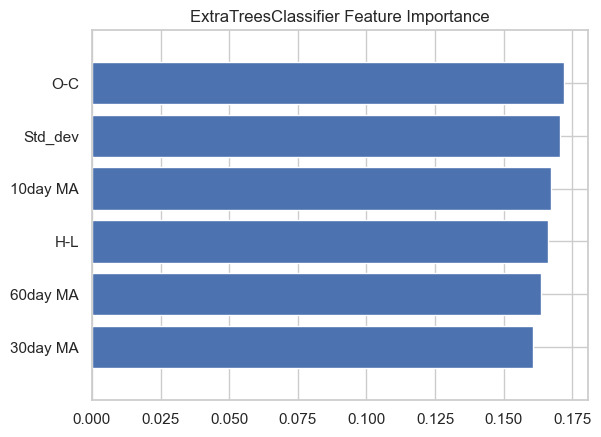

In [36]:
feature_names=X.columns
importance = clf_etc.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()


## Clasification Report 

In [41]:
pd.options.mode.chained_assignment = None
#Don't show the waring when writing in a copy slice, not the original data.
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()

#Use the test set to obtain a classification report. 
from sklearn.metrics import classification_report

# Evaluate the predictions using the classification report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.41      0.45       251
           1       0.49      0.59      0.53       241

    accuracy                           0.50       492
   macro avg       0.50      0.50      0.49       492
weighted avg       0.50      0.50      0.49       492



## Confusion matrix

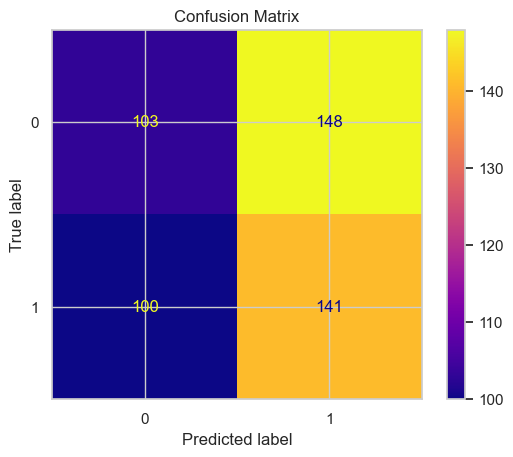

In [77]:
# Evaluate the model by means of a Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
matrix = ConfusionMatrixDisplay.from_estimator(clf_etc, X_test, Y_test, cmap='plasma')  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

## ROC plot

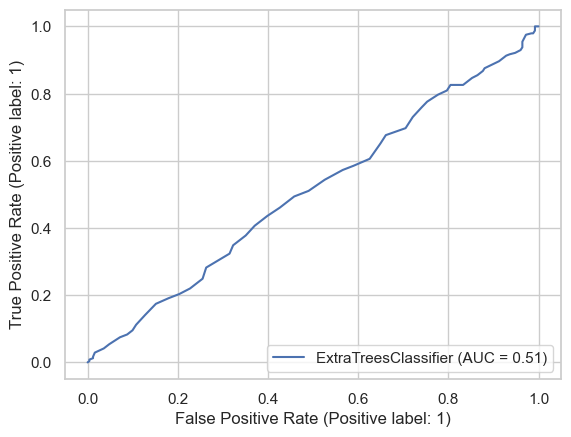

In [43]:
from sklearn.metrics import RocCurveDisplay
log_disp = RocCurveDisplay.from_estimator(clf_etc, X_test, Y_test)

# 10. Market and Strategy Returns EDA


In [53]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['Y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

                   Tomorrows Returns  Strategy Returns
Tomorrows Returns           1.000000          0.197634
Strategy Returns            0.197634          1.000000


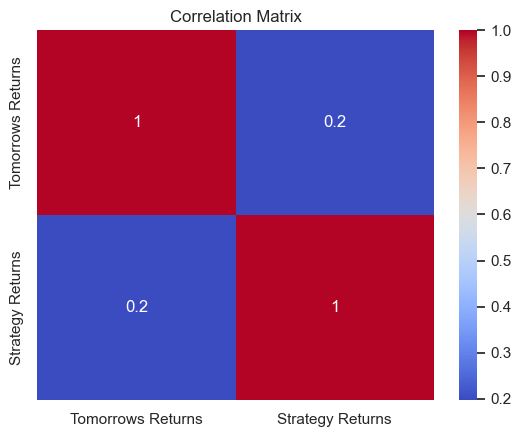

In [55]:
# Correlation Analysis
correlation = trade_dataset[['Tomorrows Returns', 'Strategy Returns']].corr()
print(correlation)

# Plotting the correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

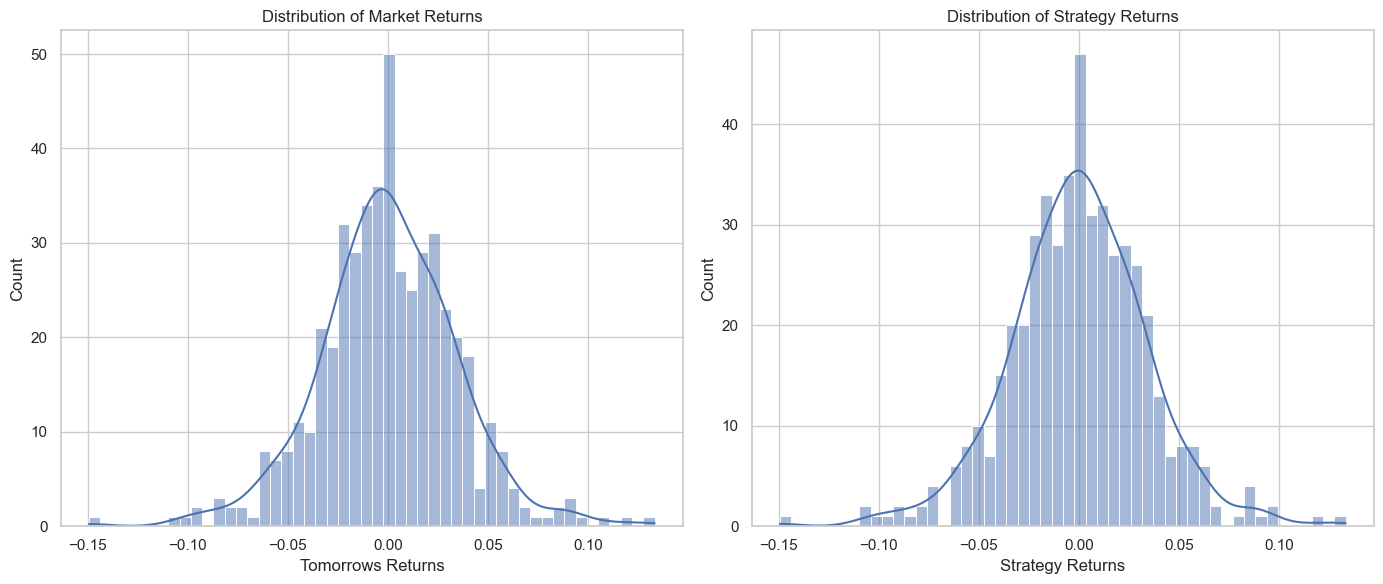

In [58]:
# 4. Distribution Analysis
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.histplot(trade_dataset['Tomorrows Returns'], bins=50, kde=True)
plt.title('Distribution of Market Returns')

plt.subplot(1,2,2)
sns.histplot(trade_dataset['Strategy Returns'], bins=50, kde=True)
plt.title('Distribution of Strategy Returns')

plt.tight_layout()
plt.show()


# 11. Cumulative Returns Analysis


In [101]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

print(trade_dataset[['Cumulative Market Returns', 'Cumulative Strategy Returns']].describe())

       Cumulative Market Returns  Cumulative Strategy Returns
count                 491.000000                   491.000000
mean                   -0.375942                     0.016696
std                     0.215565                     0.165425
min                    -0.894825                    -0.406168
25%                    -0.522990                    -0.080185
50%                    -0.345116                     0.036833
75%                    -0.210792                     0.144114
max                     0.083230                     0.389009


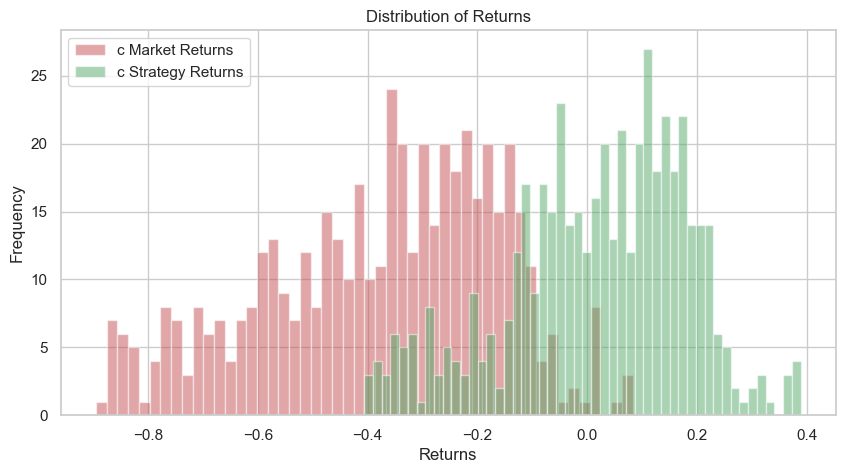

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(trade_dataset['Cumulative Market Returns'], bins=50, alpha=0.5, label='c Market Returns', color='r')
plt.hist(trade_dataset['Cumulative Strategy Returns'], bins=50, alpha=0.5, label='c Strategy Returns', color='g')
plt.legend()
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()


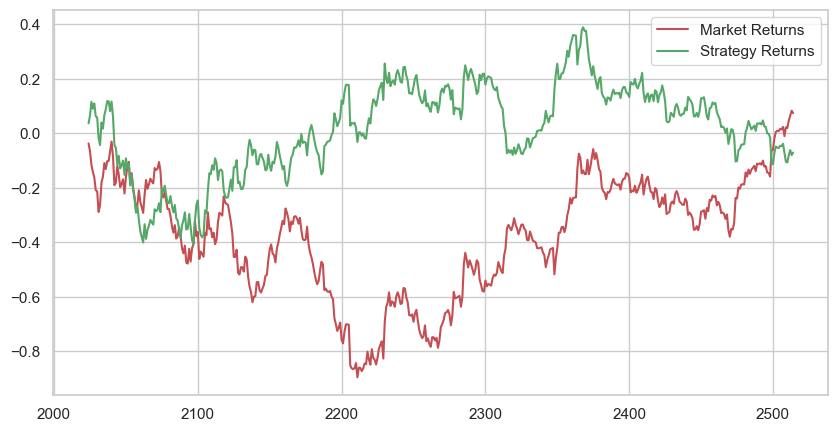

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

# 12. Predictive Capability of Machine Learning
Selection of the assumption regarding machine learning's predictive capability.
Argumentation based on coursework findings and literature.
Reflection on the limitations and implications of the study.




Based on the critical review of the trading stategy and the machine learning models used, it is evident that machine learning cannot predict the price rise of the stock AMD. 

# Conclusion


# References
